<a href="https://colab.research.google.com/github/diyarrr/ML/blob/main/Linear_regression_with_one_var.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a linear regression model from the scratch.
--> Since it is a simple model, it is going to work with only one variable.


In [ ]:
# import needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [ ]:
# create the dataset

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2.8, 4.1, 6.2, 6.8, 8.7, 9.3, 10.9, 12.1, 13.4, 15.6])


X.shape, y.shape


((10,), (10,))

Text(0, 0.5, 'Y values')

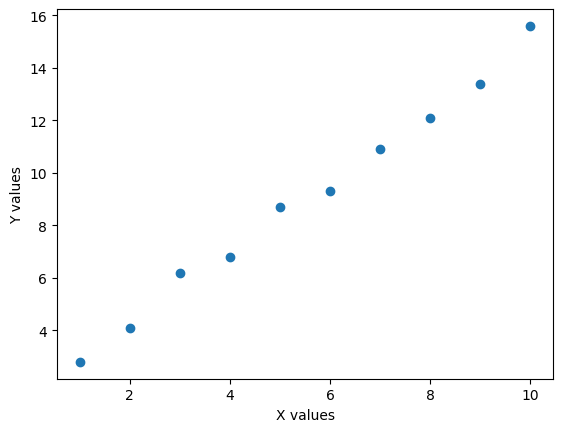

In [ ]:
# plot the data to see it visually
plt.scatter(X, y)

plt.xlabel("X values")
plt.ylabel("Y values")

## Cost function

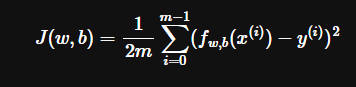

In [ ]:
# cost function

def cost(y, y_pred):
  total = sum([val**2 for val in (y - y_pred)])
  return total / len(y)


To find the suitable parameters for the model I will use gradient descent algoritm which minimizes the cost function.

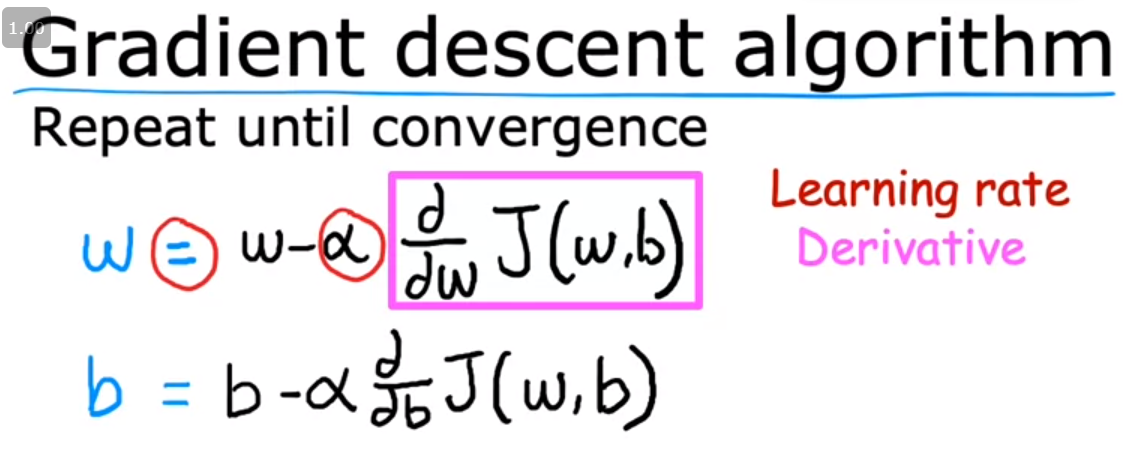

In [ ]:
# calculate partial derivatives
def der_a(x, y, y_pred):
  total = sum(x * (y - y_pred))
  return -(2 / len(x)) * total
    
def der_b(y, y_pred):
  total = sum(y - y_pred)
  return -(2 / len(y)) * total

In [ ]:
# gradient descent algorithm

def gradient_descent(x, y):
  # initial values for a and b
  a = 0
  b = 0

  # learning rate, it decides how far to move in a function. Usually its value is between 0 and 1
  lr = 0.01
  prev_cost = 1
  i = 0

  
  while True:
    # our function is f(x) = ax + b
    y_pred = a * x + b
    # calculate cost and partial derivatives
    curr_cost = cost(y, y_pred)
    # if the cost value start to converge just break it
    if math.isclose(prev_cost, curr_cost, rel_tol=1e-20):
      break;
    da = der_a(x, y, y_pred)
    db = der_b(y, y_pred)

    # new a and b values
    a = a - lr * da
    b = b - lr * db
    prev_cost = curr_cost
    #print ("m {}, b {}, cost {} step {}".format(a, b, curr_cost, i))
    i = i + 1
  
  # return the best parameters and the step required to find them
  return [a, b, i]
    

In [ ]:
res = gradient_descent(X, y)

In [ ]:
res

[1.349697021857459, 1.566666303534605, 3594]

In [ ]:
# I am going to create my model with these values
def model(x):
  return res[0] * x + res[1]

In [ ]:
# predict a value
model(11)

16.413333543966655

In [ ]:
# make predictions for a few numbers
x_test = []
y_preds = []
for i in range(11, 20):
  y_preds.append(model(i))
  x_test.append(i)

y_preds

[16.413333543966655,
 17.763030565824113,
 19.112727587681572,
 20.46242460953903,
 21.81212163139649,
 23.16181865325395,
 24.511515675111408,
 25.861212696968867,
 27.210909718826326]

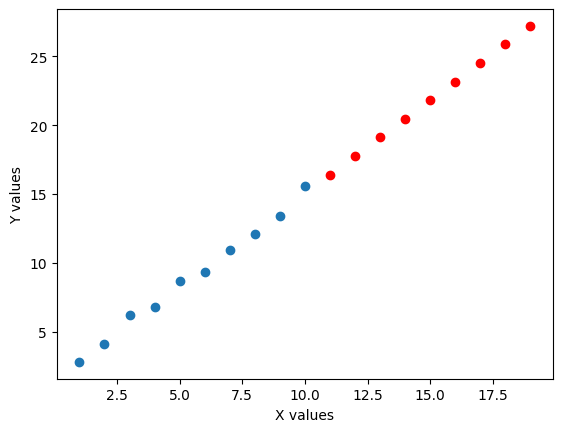

In [ ]:
# plot them
plt.xlabel("X values")
plt.ylabel("Y values")

plt.scatter(X, y, label="train set")
plt.scatter(x_test, y_preds, color = "red", label="predictions")